# The `GeoDataset` class

The `GeoDataset` is a PyTorch-compatible `Dataset` implementation that allows sampling images and labels from a `Scene` (which is a combination of a `RasterSource` and a `LabelSource`).

It comes in two flavors:
1. `SlidingWindowGeoDataset`
2. `RandomWindowGeoDataset`

Below we explore both in the context of semantic segmentation.

---

First, let's define some handy plotting functions:

In [1]:
def plot_xy(class_config, x, y):
    from matplotlib import pyplot as plt
    from matplotlib.colors import ListedColormap
    from matplotlib import patches

    fig, (ax_img, ax_label) = plt.subplots(1, 2, figsize=(12, 6))
    ax_img.imshow(x.permute(1, 2, 0))
    # ax_img.axis('off')

    cmap = ListedColormap(class_config.color_triples)

    ax_label.imshow(y, cmap=cmap)
    # ax_label.axis('off')

    legend_items = [
        patches.Patch(facecolor=cmap(i), edgecolor='black', label=cname)
        for i, cname in enumerate(class_config.names)]
    ax_label.legend(
        handles=legend_items, 
        ncol=len(class_config), 
        loc='upper center', 
        fontsize=14,
        bbox_to_anchor=(0.5, 0))

    plt.show()
    
def show_windows(img, windows, title=''):
    from matplotlib import pyplot as plt
    import matplotlib.patches as patches

    fig, ax = plt.subplots(1, 1, squeeze=True, figsize=(8, 8))
    ax.imshow(img_full)
    ax.axis('off')
    # draw windows on top of the image
    for w in windows:
        p = patches.Polygon(w.to_points(), color='r', linewidth=1, fill=False)
        ax.add_patch(p)
    ax.autoscale()
    ax.set_title(title)
    plt.show()

<hr style="border:2px solid gray">

## SlidingWindowGeoDataset

In [2]:
image_uri = 's3://spacenet-dataset/spacenet/SN7_buildings/train/L15-0331E-1257N_1327_3160_13/images/global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13.tif'
label_uri = 's3://spacenet-dataset/spacenet/SN7_buildings/train/L15-0331E-1257N_1327_3160_13/labels/global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13_Buildings.geojson'

Here we make use of the convenience API, `GeoDataset.from_uris()`, but we can also use the normal constructor if we want to manually define the `RasterSource` and `LabelSource`.

In [3]:
from rastervision.core.data import ClassConfig
from rastervision.pytorch_learner import SemanticSegmentationSlidingWindowGeoDataset

import albumentations as A

class_config = ClassConfig(
    names=['background', 'building'], 
    colors=['lightgray', 'darkred'],
    null_class='background')

ds = SemanticSegmentationSlidingWindowGeoDataset.from_uris(
    class_config=class_config,
    image_uri=image_uri,
    label_vector_uri=label_uri,
    label_vector_default_class_id=class_config.get_class_id('building'),
    image_raster_source_kw=dict(allow_streaming=True),
    size=200,
    stride=200,
    transform=A.Resize(256, 256)
)

2022-09-13 12:52:10:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/spacenet-dataset/spacenet/SN7_buildings/train/L15-0331E-1257N_1327_3160_13/labels/global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13_Buildings.geojson.


In [4]:
x, y = ds[0]
x.shape, y.shape

(torch.Size([3, 256, 256]), torch.Size([256, 256]))

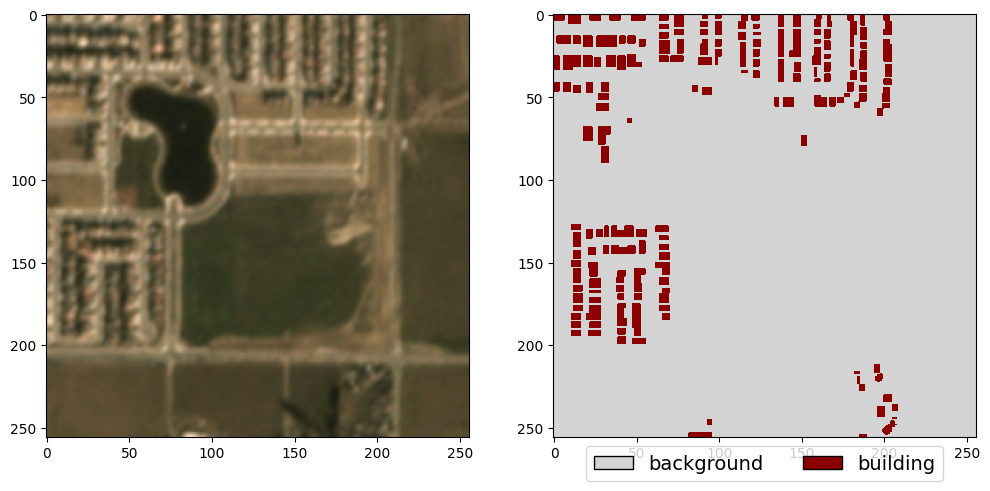

In [5]:
plot_xy(class_config, x, y)

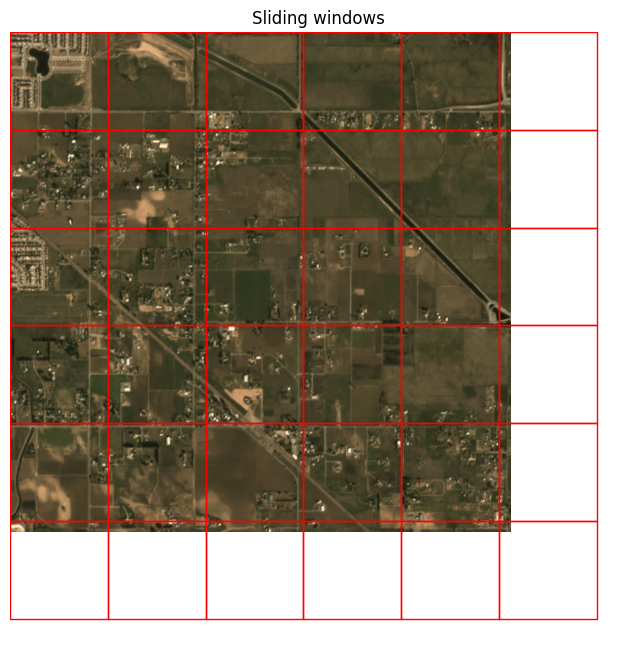

In [6]:
img_full = ds.scene.raster_source[:, :]
show_windows(img_full, ds.windows, title='Sliding windows')

2022-09-13 12:52:17:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/spacenet-dataset/spacenet/SN7_buildings/train/L15-0331E-1257N_1327_3160_13/labels/global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13_Buildings.geojson.


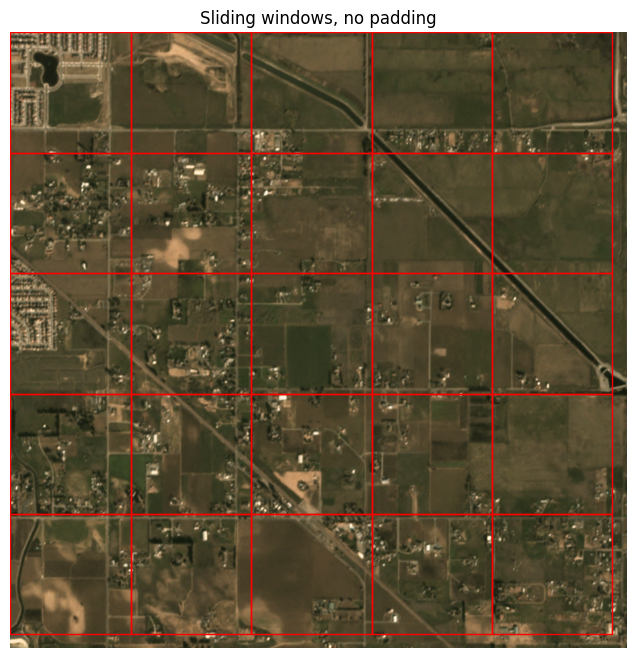

In [7]:
ds = SemanticSegmentationSlidingWindowGeoDataset.from_uris(
    class_config=class_config,
    image_uri=image_uri,
    label_vector_uri=label_uri,
    label_vector_default_class_id=class_config.get_class_id('building'),
    image_raster_source_kw=dict(allow_streaming=True),
    size=200,
    stride=200,
    transform=A.Resize(256, 256),
    padding=0
)

img_full = ds.scene.raster_source[:, :]
show_windows(img_full, ds.windows, title='Sliding windows, no padding')

<hr style="border:2px solid gray">

## RandomWindowGeoDataset

In [8]:
image_uri = 's3://spacenet-dataset/spacenet/SN7_buildings/train/L15-0331E-1257N_1327_3160_13/images/global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13.tif'
label_uri = 's3://spacenet-dataset/spacenet/SN7_buildings/train/L15-0331E-1257N_1327_3160_13/labels/global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13_Buildings.geojson'

Here we make use of the convenience API, `GeoDataset.from_uris()`, but we can also use the normal constructor if we want to manually define the `RasterSource` and `LabelSource`.

2022-09-13 12:52:22:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/spacenet-dataset/spacenet/SN7_buildings/train/L15-0331E-1257N_1327_3160_13/labels/global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13_Buildings.geojson.


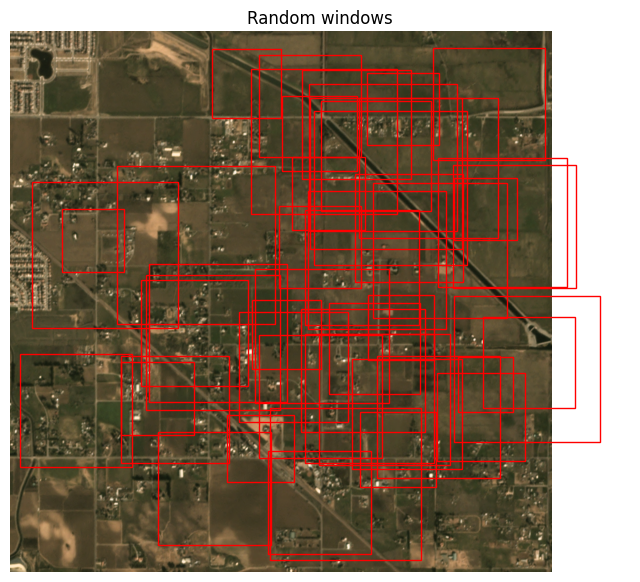

In [9]:
from rastervision.core.data import ClassConfig
from rastervision.pytorch_learner import SemanticSegmentationRandomWindowGeoDataset

import albumentations as A

class_config = ClassConfig(
    names=['background', 'building'], 
    colors=['lightgray', 'darkred'],
    null_class='background')

ds = SemanticSegmentationRandomWindowGeoDataset.from_uris(
    class_config=class_config,
    image_uri=image_uri,
    label_vector_uri=label_uri,
    label_vector_default_class_id=class_config.get_class_id('building'),
    image_raster_source_kw=dict(allow_streaming=True),
    size_lims=(100, 300),
    out_size=256,
    padding=100
)

img_full = ds.scene.raster_source[:, :]
windows = [ds.sample_window() for _ in range(50)]
show_windows(img_full, windows, title='Random windows')

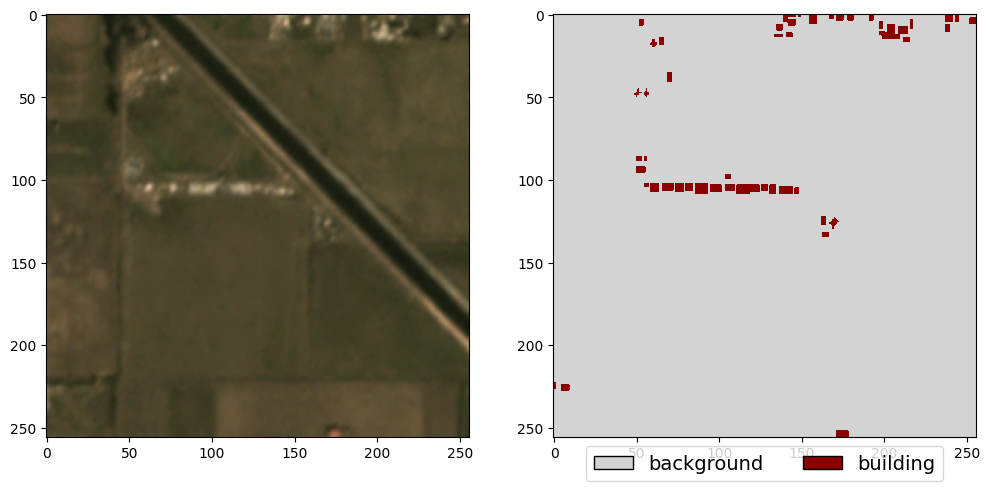

In [10]:
x, y = ds[0]
plot_xy(class_config, x, y)